In [119]:
from plots import *
from PMs import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

from sklearn.metrics import accuracy_score
from statistics import mode
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import spearmanr

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 
np.set_printoptions(precision=2)


In [120]:
ds = pd.read_excel('data/MS_text_XRF_hydr.xlsx')

ds['EC_HP'] = logsdon(50e6, ds.field_realperm, ds.field_imperm)
print(ds.describe())

#Clean datasets
#df = ds.dropna(subset=['Xlf_IP', 'Clay'])
df = ds.dropna(subset=['Xlf_IP', 'Clay'])
df_xrf = ds.dropna(subset=['Xlf_IP', 'Fe', 'Clay', 'EC_HP', 'MS_field'])

df_xrf.describe()

           NUMBER    Duration       Depth   MS_field     Klf_IP     Klf_QP  \
count   56.000000   56.000000   56.000000  56.000000  69.000000  56.000000   
mean   128.500000  361.190357   84.607143   0.000177   0.000698   0.000008   
std    129.429517    0.740427   60.721923   0.000247   0.001209   0.000008   
min      1.000000  360.010000    4.000000   0.000000   0.000003  -0.000002   
25%     14.750000  360.647500   42.250000   0.000040   0.000063   0.000002   
50%     83.000000  361.230000   69.000000   0.000118   0.000155   0.000005   
75%    234.500000  361.722500  110.000000   0.000165   0.000527   0.000010   
max    396.000000  362.660000  258.000000   0.001160   0.005580   0.000037   

           Ph_F1       Mass         #_y      Rg_F3     Khf_IP        Khf_QP  \
count  56.000000  69.000000   56.000000  56.000000  69.000000  5.600000e+01   
mean    1.780714  14.700870  443.767857   3.035714   0.000651  5.588430e-07   
std     6.280166   1.670142  205.886022   0.187256   0.00112

,NUMBER,Duration,Depth,MS_field,Klf_IP,Klf_QP,Ph_F1,Mass,#_y,Rg_F3,Khf_IP,Khf_QP,Ph_F3,Xlf_IP,Xhf_IP,Kfd_abs,Kfd,Xfd_abs,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,...,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Archaeology,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO,field volumetric water content (%),field_realperm,field_imperm,field_temp,EC_HP
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,5.500000e+01,5.500000e+01,55.0,55.000000,55.0,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.0,55.0,55.0,55.0,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,123.636364,361.195636,83.781818,0.000179,0.000190,0.000008,1.796364,14.884909,443.963636,3.036364,0.000179,5.589093e-07,1.759455,1.325893e-05,1.246049e-05,1.152645e-05,8.238663,7.984425e-07,8.128406e+05,0.0,3400.544545,0.0,105275.426182,0.0,5.682182,1.385273,339.404364,2.838545,88.37400,1.514182,0.0,3.006364,52.487273,1.424545,4.743273,1.293091,14.694182,2.111091,0.0,3.131091,0.0,1.692182,7.683818,2.070909,0.080909,4.022909,34.658364,3.486727,0.0,16.205636,...,506560.264364,1098.811273,7.418909,1.081818,3.271091,1.829636,0.0,1.5,0.0,1.5,0.0,1.5,55701.283818,1157.281818,234.392364,217.892000,379832.057455,1048.438909,5.521091,18.392727,1815.096364,1328.434000,6.980182,14.658909,0.811455,8.871091,0.0,19.178909,20.563636,0.527273,1.561451,83.527273,6.343455,1.239600,7.253273,10.160810,16.241576,12.208203,22.402865,34.611068,35.588189,13.559168,49.147357,1.168896,3.281818,29.219818,22.169091,17.276364,19.678545,0.028264
std,125.351559,0.746187,60.963769,0.000248,0.000232,0.000008,6.336947,1.501824,207.778369,0.188919,0.000219,1.950755e-06,3.723411,1.621184e-05,1.529843e-05,1.426443e-05,9.373599,9.886150e-07,1.400768e+05,0.0,2457.824579,0.0,37304.149899,0.0,2.797263,0.126064,155.780290,0.702573,56.09772,0.498367,0.0,0.542932,24.691558,0.357252,2.797838,0.143732,9.216499,0.338831,0.0,0.228032,0.0,0.131328,6.429231,0.362232,0.600038,0.351782,36.967806,0.761981,0.0,1.296119,...,28066.562465,75.111357,4.376775,0.186677,3.178111,0.326434,0.0,0.0,0.0,0.0,0.0,0.0,19737.645560,242.727317,471.437259,311.848182,65456.423031,56.474120,31.544447,2.541130,1680.929766,514.373398,14.403258,10.752702,3.497562,0.888969,0.0,1.080394,18.081875,0.503857,0.165571,61.036071,8.781970,1.753932,1.151838,9.669113,12.377750,8.633779,16.344766,23.544943,20.712381,21.245357,31.798037,1.128989,5.190415,13.996021,12.382228,15.350159,5.871146,0.022188
min,1.000000,360.010000,4.000000,0.000000,0.000003,-0.000002,-37.920000,11.980000,65.000000,3.000000,0.000001,-6.072000e-06,-0.790000,1.608132e-07,8.064890e-08,2.030000e-07,2.891030,1.196229e-08,4.877352e+05,0.0,0.000000,0.0,30473.500000,0.0,0.000000,1.090000,43.120000,1.190000,11.11000,0.690000,0.0,1.940000,9.580000,0.740000,0.000000,0.940000,2.330000,1.530000,0.0,2.740000,0.0,1.450000,0.000000,1.450000,0.000000,2.760000,0.000000,2.480000,0.0,14.000000,...,465954.720000

In [121]:
# Remove the most obvious outlier in 'Xlf_IP'
def remove_outlier(df, column_name):
    # Identify the outlier
    mean = df[column_name].mean()
    std = df[column_name].std()
    threshold = 3  # Set threshold for identifying outliers
    outliers = df[np.abs(df[column_name] - mean) > threshold * std]

    if not outliers.empty:
        # Find the most extreme outlier
        most_extreme_outlier = outliers.iloc[np.abs(outliers[column_name] - mean).argmax()]
        df = df[df[column_name] != most_extreme_outlier[column_name]]

    return df

df_xrf = remove_outlier(df_xrf, 'Xlf_IP')

df_filtered     Depth        Xlf_IP       Kfd_abs        Kfd       Xfd_abs        SiO2  \
1    30.0  1.341209e-05  1.580000e-05   8.186528  1.097985e-06   660746.69   
2    55.0  6.584459e-06  4.680000e-06   4.802463  3.162162e-07   773071.75   
3    63.0  1.181358e-05  1.260000e-05   7.706422  9.104046e-07   667377.88   
4    80.0  6.437941e-06  4.460000e-06   4.885530  3.145275e-07   723505.50   
5   107.0  1.035452e-05  1.160000e-05   7.493540  7.759197e-07   724995.06   
6   120.0  5.806070e-06  3.710000e-06   4.729730  2.746114e-07   487735.19   
7   154.0  7.147814e-06  6.410000e-06   6.223301  4.448300e-07   741330.50   
8   185.0  7.815603e-06  6.300000e-06   5.716878  4.468085e-07   674528.31   
9   205.0  2.383973e-05  1.280000e-05   4.481793  1.068447e-06   620389.13   
10  237.0  5.547812e-06  3.450000e-06   5.039439  2.795786e-07   681480.69   
11  258.0  5.314800e-06  2.990000e-06   4.405481  2.341425e-07   502365.91   
12   72.0  4.642857e-05  6.370000e-05   9.158879  4.

c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


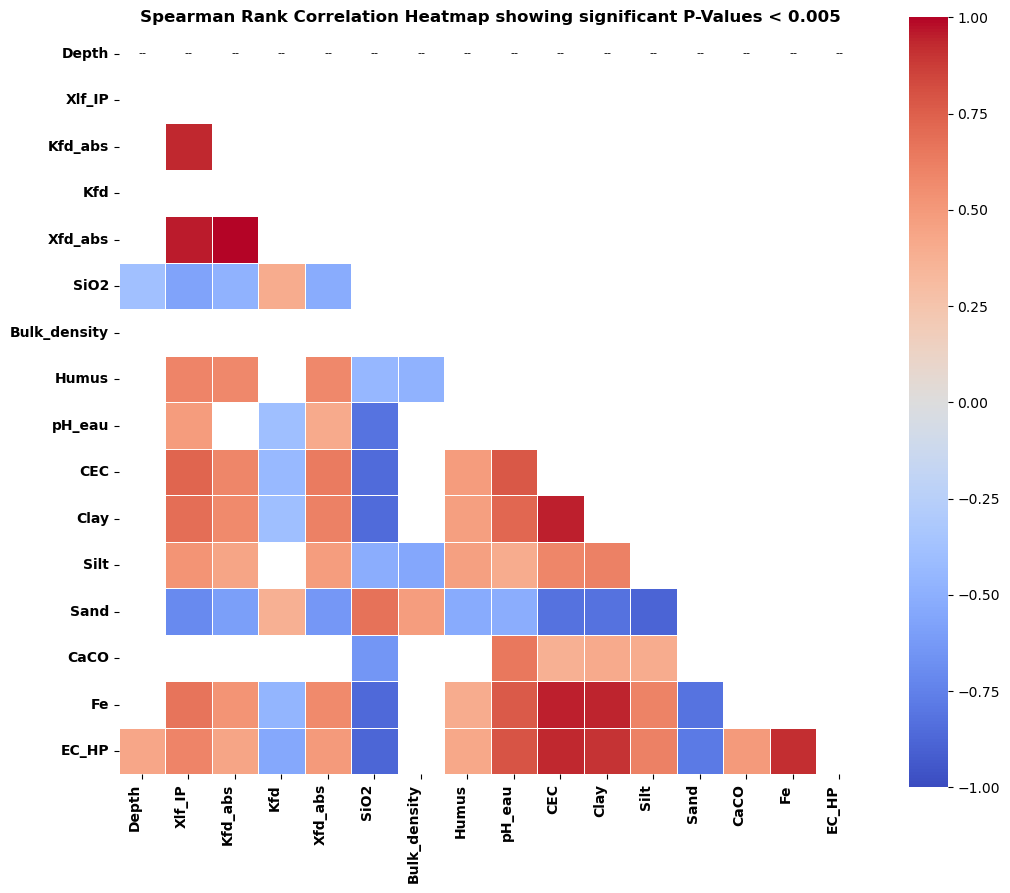

In [122]:
filtered_features = ['Depth', 'Xlf_IP', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'SiO2', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO', 'Fe', 'EC_HP']

# Drop rows with NaN values in the filtered features to handle NaNs
df_filtered = df_xrf[filtered_features].dropna()

print('df_filtered', df_filtered)
# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df_filtered, nan_policy='omit')

print('corr', corr)

# Convert to DataFrame for easier plotting
corr_df = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)
print('corr_df', corr_df)
p_value_df = pd.DataFrame(p_value, index=filtered_features, columns=filtered_features)

# Create a mask for significant p-values (e.g., p < 0.01)
p_value_mask = 0.005
significant_mask = p_value_df < p_value_mask

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Combine the masks
final_mask = mask | ~significant_mask

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=final_mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, vmin=-1, vmax=1, annot_kws={"size": 8, "color": "black"})

# Adjust layout for better readability
plt.xticks(rotation=90, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.title('Spearman Rank Correlation Heatmap showing significant P-Values < '+str(p_value_mask), fontsize=12, fontweight='bold')

# Show the plot
folder_path = 'figures_output/'
filename = f"Corr_Hysteresis.png"
plt.savefig(folder_path + filename)
plt.show()

c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

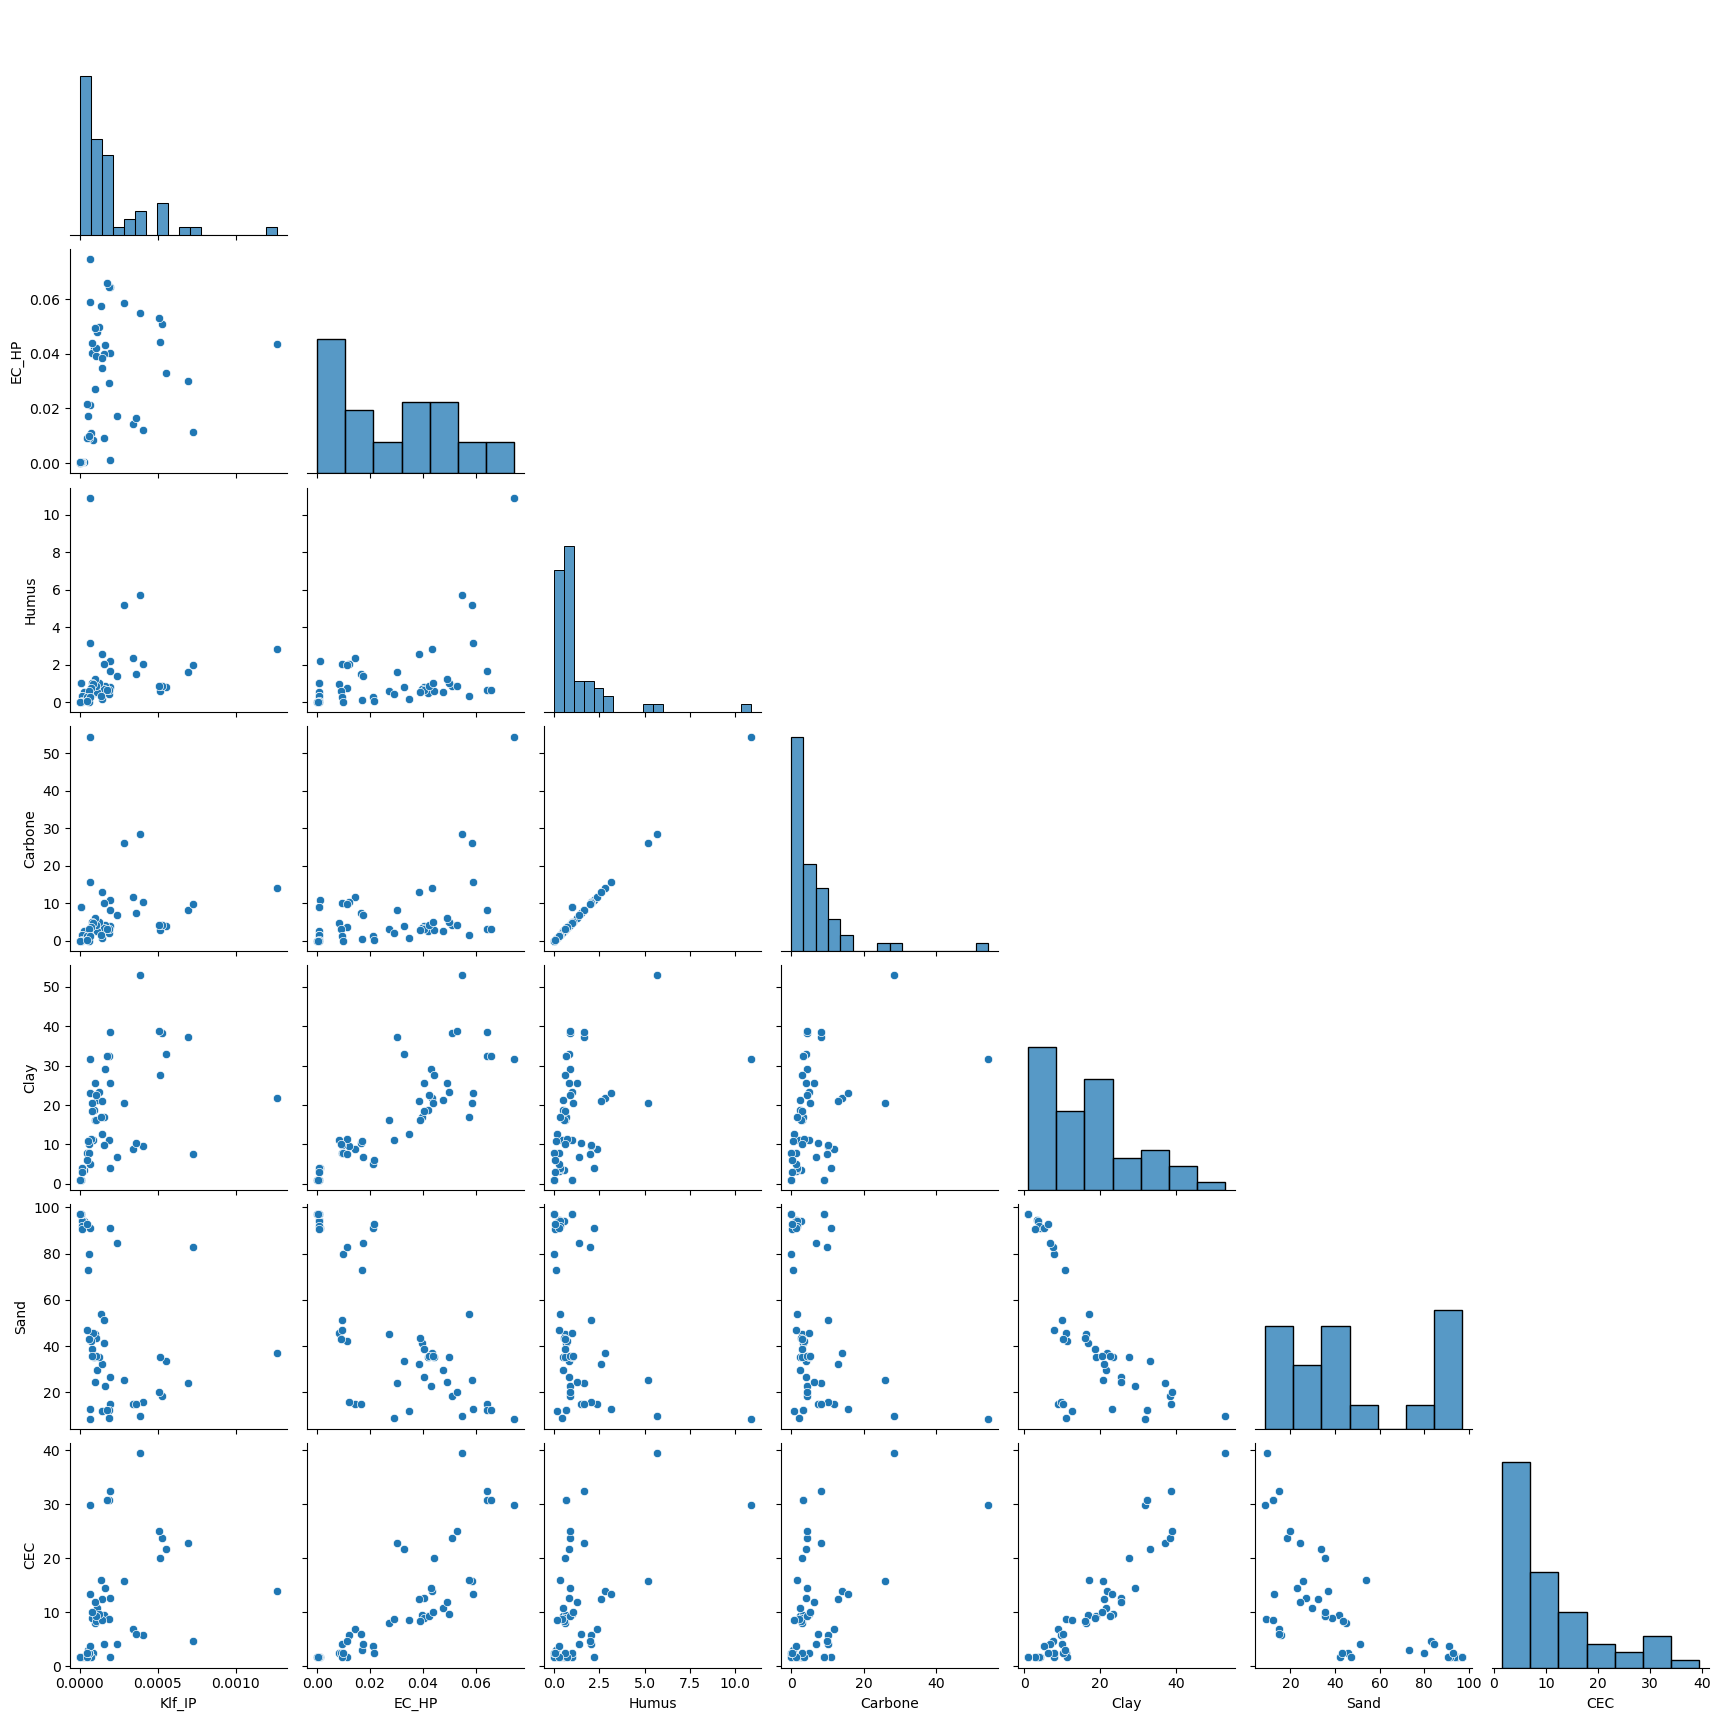

In [123]:
g = sns.pairplot(df.loc[:,['Klf_IP', 'EC_HP', 'Humus', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=True), corner=True)
plt.show()

filtered_df[x_col_name] 44    0.009222
45    0.008456
46    0.011117
47    0.009177
48    0.009277
49    0.017087
50    0.009874
Name: EC_HP, dtype: float64
yfiltered_df[y_col_name] 44    4.148922
45    2.424794
46    1.600000
47    2.425808
48    1.600000
49    2.975095
50    2.405108
Name: CEC, dtype: float64
filtered_df[x_col_name] 51    0.011337
52    0.017197
53    0.021301
54    0.021493
Name: EC_HP, dtype: float64
yfiltered_df[y_col_name] 51    4.678718
52    4.106865
53    3.788493
54    2.419281
Name: CEC, dtype: float64
filtered_df[x_col_name] 34    0.038560
35    0.049799
36    0.042158
37    0.049241
38    0.043927
Name: EC_HP, dtype: float64
yfiltered_df[y_col_name] 34    12.502412
35     9.610166
36     9.199741
37    11.937388
38     9.942906
Name: CEC, dtype: float64
filtered_df[x_col_name] 23    0.014335
24    0.012040
25    0.016557
26    0.029242
27    0.034742
Name: EC_HP, dtype: float64
yfiltered_df[y_col_name] 23    6.862481
24    5.679917
25    6.004961
26    8.7

C:\Users\mendo\AppData\Local\Temp\ipykernel_26964\1129436052.py:32: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(filtered_df[x_col_name], filtered_df[y_col_name], 1)


filtered_df[x_col_name] 39    5.700
40    1.670
41    0.634
42    0.634
43    0.314
Name: Humus, dtype: float64
yfiltered_df[y_col_name] 39    39.483189
40    32.478817
41    30.812075
42    30.812075
43    16.007236
Name: CEC, dtype: float64
filtered_df[x_col_name] 28    1.0
29    1.0
30    0.0
31    0.0
32    0.0
33    0.0
Name: Humus, dtype: float64
yfiltered_df[y_col_name] 28    1.6
29    1.6
30    1.6
31    1.6
32    1.6
33    1.6
Name: CEC, dtype: float64
filtered_df[x_col_name] 12    1.626
13    0.796
14    0.580
15    0.868
16    0.858
Name: Humus, dtype: float64
yfiltered_df[y_col_name] 12    22.890062
13    21.699118
14    19.975019
15    23.816887
16    25.035507
Name: CEC, dtype: float64
filtered_df[x_col_name] 17    2.190
18    0.552
19    0.244
20    0.334
21    0.328
22    0.060
Name: Humus, dtype: float64
yfiltered_df[y_col_name] 17    1.6
18    1.6
19    1.6
20    1.6
21    1.6
22    1.6
Name: CEC, dtype: float64
filtered_df[x_col_name] 1      0.808
2      0.612
3     

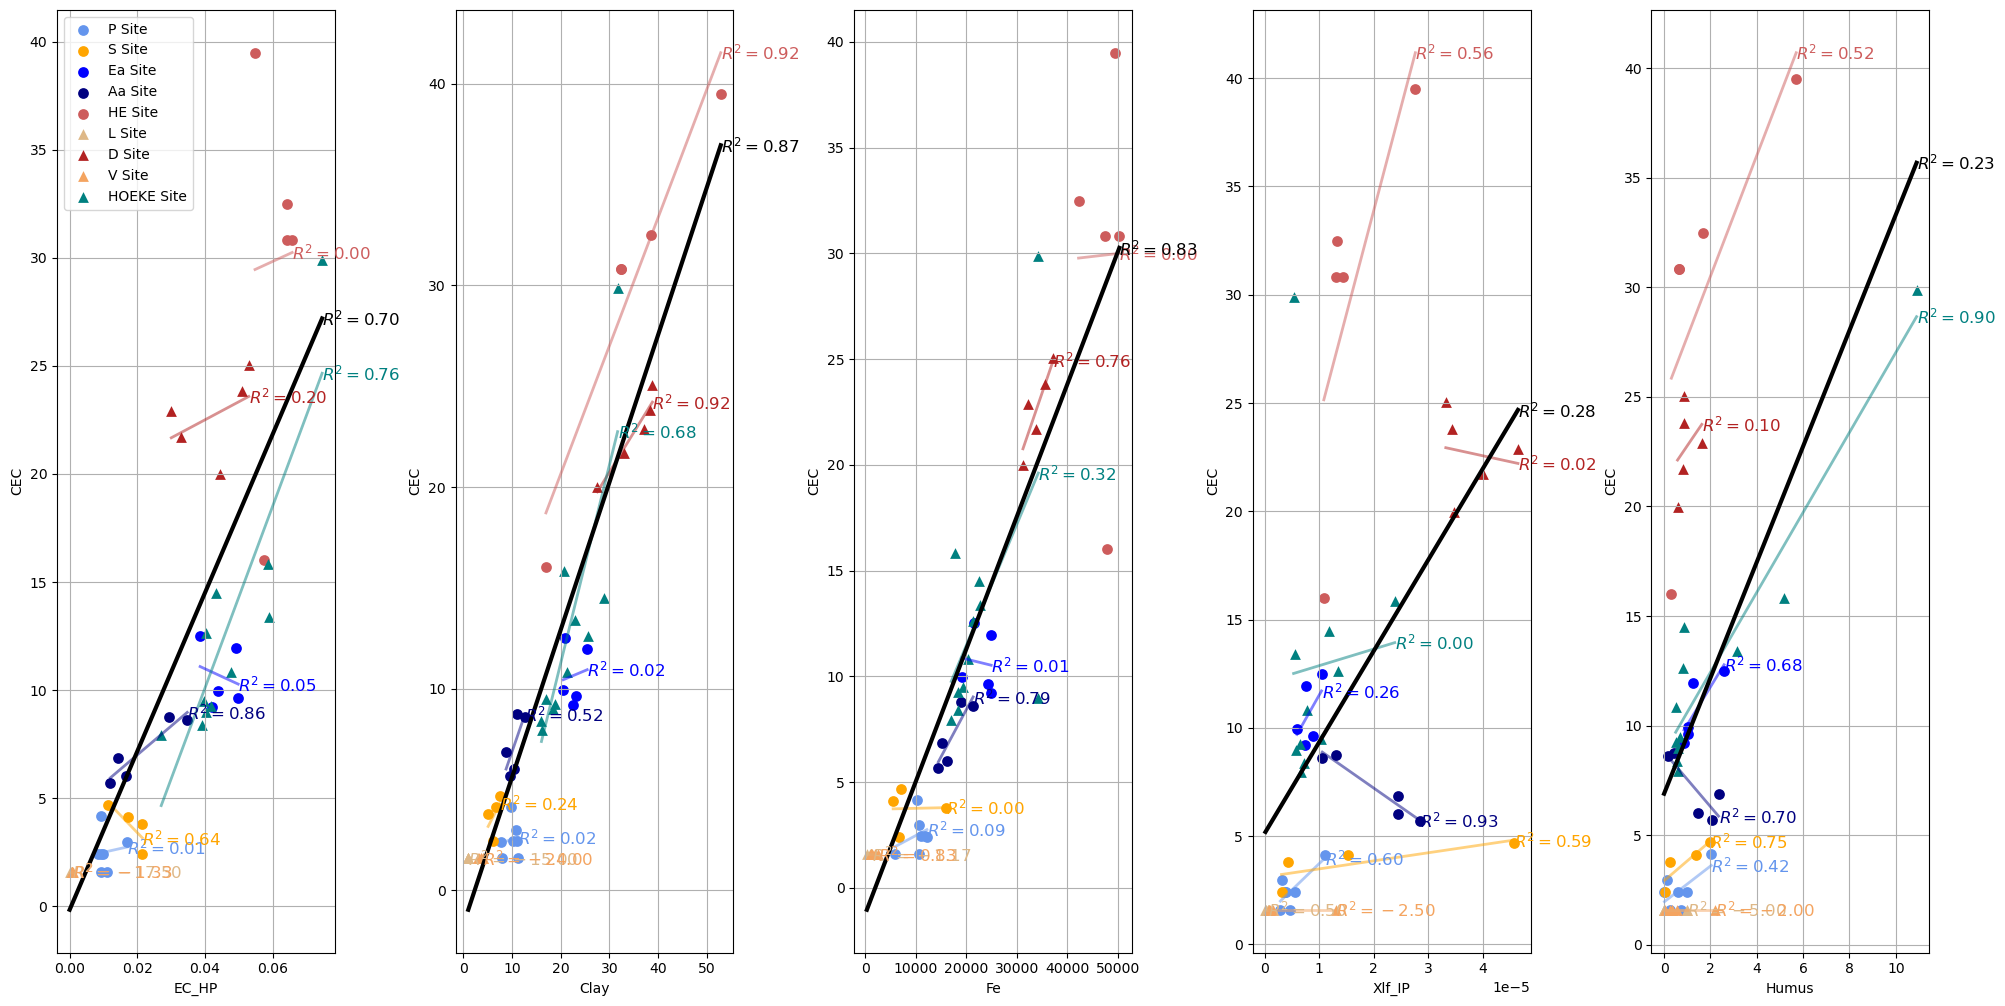

In [124]:
mapping = {
    # "AN": ("black", "o"),
    "P": ("cornflowerblue", "o"),
    "S": ("orange", "o"),
    "Ea": ("blue", "o"),
    "Aa": ("navy", "o"),
    "HE": ("indianred", "o"),
    "L": ("burlywood", "^"),
    "D": ("firebrick", "^"),
    "V": ("sandybrown", "^"),
    "HOEKE": ("teal", "^"),
    "EHBH": ("seagreen", "^"),
}

def plot_data1(axis, df, x_col_name, y_col_name, include_label=False, aa=0.7, ss=60, lw=0, label_fontsize=10, legend_fontsize=10):
    slopes = []
    intercepts = []
    avg_xlf_ips = []

    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        filtered_df = df[mask]

        if not filtered_df.empty:  # Ensure there are points to plot and fit
            # Scatter plot
            axis.scatter(filtered_df[x_col_name], filtered_df[y_col_name], s=ss, linewidth=lw, c=color, marker=marker, label=f"{start_str} Site" if include_label else None)
            
            # Linear regression for individual sites
            print('filtered_df[x_col_name]', filtered_df[x_col_name])
            print('yfiltered_df[y_col_name]', filtered_df[y_col_name])
            
            slope, intercept = np.polyfit(filtered_df[x_col_name], filtered_df[y_col_name], 1)
            x_fit = np.linspace(filtered_df[x_col_name].min(), filtered_df[x_col_name].max(), 100)
            y_fit = slope * x_fit + intercept
            axis.plot(x_fit, y_fit, color=color, linestyle='-', linewidth=2, alpha=0.5)
            
            # Save the slope, intercept, and average Xlf_IP
            slopes.append(slope)
            intercepts.append(intercept)
            avg_xlf_ips.append(filtered_df['Xlf_IP'].mean())
            
            # Calculate and display R^2 score for individual sites
            y_pred = slope * filtered_df[x_col_name] + intercept
            r2 = r2_score(filtered_df[y_col_name], y_pred)
            axis.text(x_fit[-1], y_fit[-1], f"$R^2={r2:.2f}$", color=color, fontsize=12, ha='left', va='center')

    # Global linear regression for all points in the current subplot
    global_slope, global_intercept = np.polyfit(df[x_col_name], df[y_col_name], 1)
    x_fit_global = np.linspace(df[x_col_name].min(), df[x_col_name].max(), 100)
    y_fit_global = global_slope * x_fit_global + global_intercept
    axis.plot(x_fit_global, y_fit_global, color='black', linestyle='-', linewidth=3)

    # Calculate and display global R^2 score
    y_pred_global = global_slope * df[x_col_name] + global_intercept
    r2_global = r2_score(df[y_col_name], y_pred_global)
    axis.text(x_fit_global[-1], y_fit_global[-1], f"$R^2={r2_global:.2f}$", color='black', fontsize=12, ha='left', va='center')

    if include_label:
        axis.legend(fontsize=legend_fontsize)
    
    return slopes, intercepts, avg_xlf_ips

fig, axs = plt.subplots(1, 5, figsize=(20, 10))

# First row plots using df
# Plot scatter and regression lines for EC_HP vs CEC
plot_data1(axs[0], df_xrf, 'EC_HP', 'CEC', include_label=True)
axs[0].set_xlabel('EC_HP')
axs[0].set_ylabel('CEC')
axs[0].grid(True)

# Plot scatter and regression lines for Clay vs CEC
plot_data1(axs[1], df_xrf, 'Clay', 'CEC', include_label=False)
axs[1].set_xlabel('Clay')
axs[1].set_ylabel('CEC')
axs[1].grid(True)

# Plot scatter and regression lines for Fe vs CEC
plot_data1(axs[2], df_xrf, 'Fe', 'CEC', include_label=False)
axs[2].set_xlabel('Fe')
axs[2].set_ylabel('CEC')
axs[2].grid(True)

# Plot scatter and regression lines for Xlf_IP vs CEC
plot_data1(axs[3], df_xrf, 'Xlf_IP', 'CEC', include_label=False)
axs[3].set_xlabel('Xlf_IP')
axs[3].set_ylabel('CEC')
axs[3].grid(True)

# Plot scatter and regression lines for Xlf_IP vs CEC
plot_data1(axs[4], df_xrf, 'Humus', 'CEC', include_label=False)
axs[4].set_xlabel('Humus')
axs[4].set_ylabel('CEC')
axs[4].grid(True)

plt.tight_layout(pad=.50)  # Reduced padding between subplots
plt.show()

filtered_df[x_col_name] 44     9.842520
45    10.979857
46    11.257880
47    10.158013
48     7.897112
49    10.750297
50     7.734237
Name: Clay, dtype: float64
yfiltered_df[y_col_name] 44    4.148922
45    2.424794
46    1.600000
47    2.425808
48    1.600000
49    2.975095
50    2.405108
Name: CEC, dtype: float64
filtered_df[x_col_name] 51    7.480551
52    6.650902
53    5.082777
54    6.119511
Name: Clay, dtype: float64
yfiltered_df[y_col_name] 51    4.678718
52    4.106865
53    3.788493
54    2.419281
Name: CEC, dtype: float64
filtered_df[x_col_name] 34    20.934517
35    23.232658
36    22.466301
37    25.445293
38    20.532194
Name: Clay, dtype: float64
yfiltered_df[y_col_name] 34    12.502412
35     9.610166
36     9.199741
37    11.937388
38     9.942906
Name: CEC, dtype: float64
filtered_df[x_col_name] 23     8.771930
24     9.525321
25    10.301109
26    11.034048
27    12.616306
Name: Clay, dtype: float64
yfiltered_df[y_col_name] 23    6.862481
24    5.679917
25    6.004

C:\Users\mendo\AppData\Local\Temp\ipykernel_26964\1129436052.py:32: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(filtered_df[x_col_name], filtered_df[y_col_name], 1)


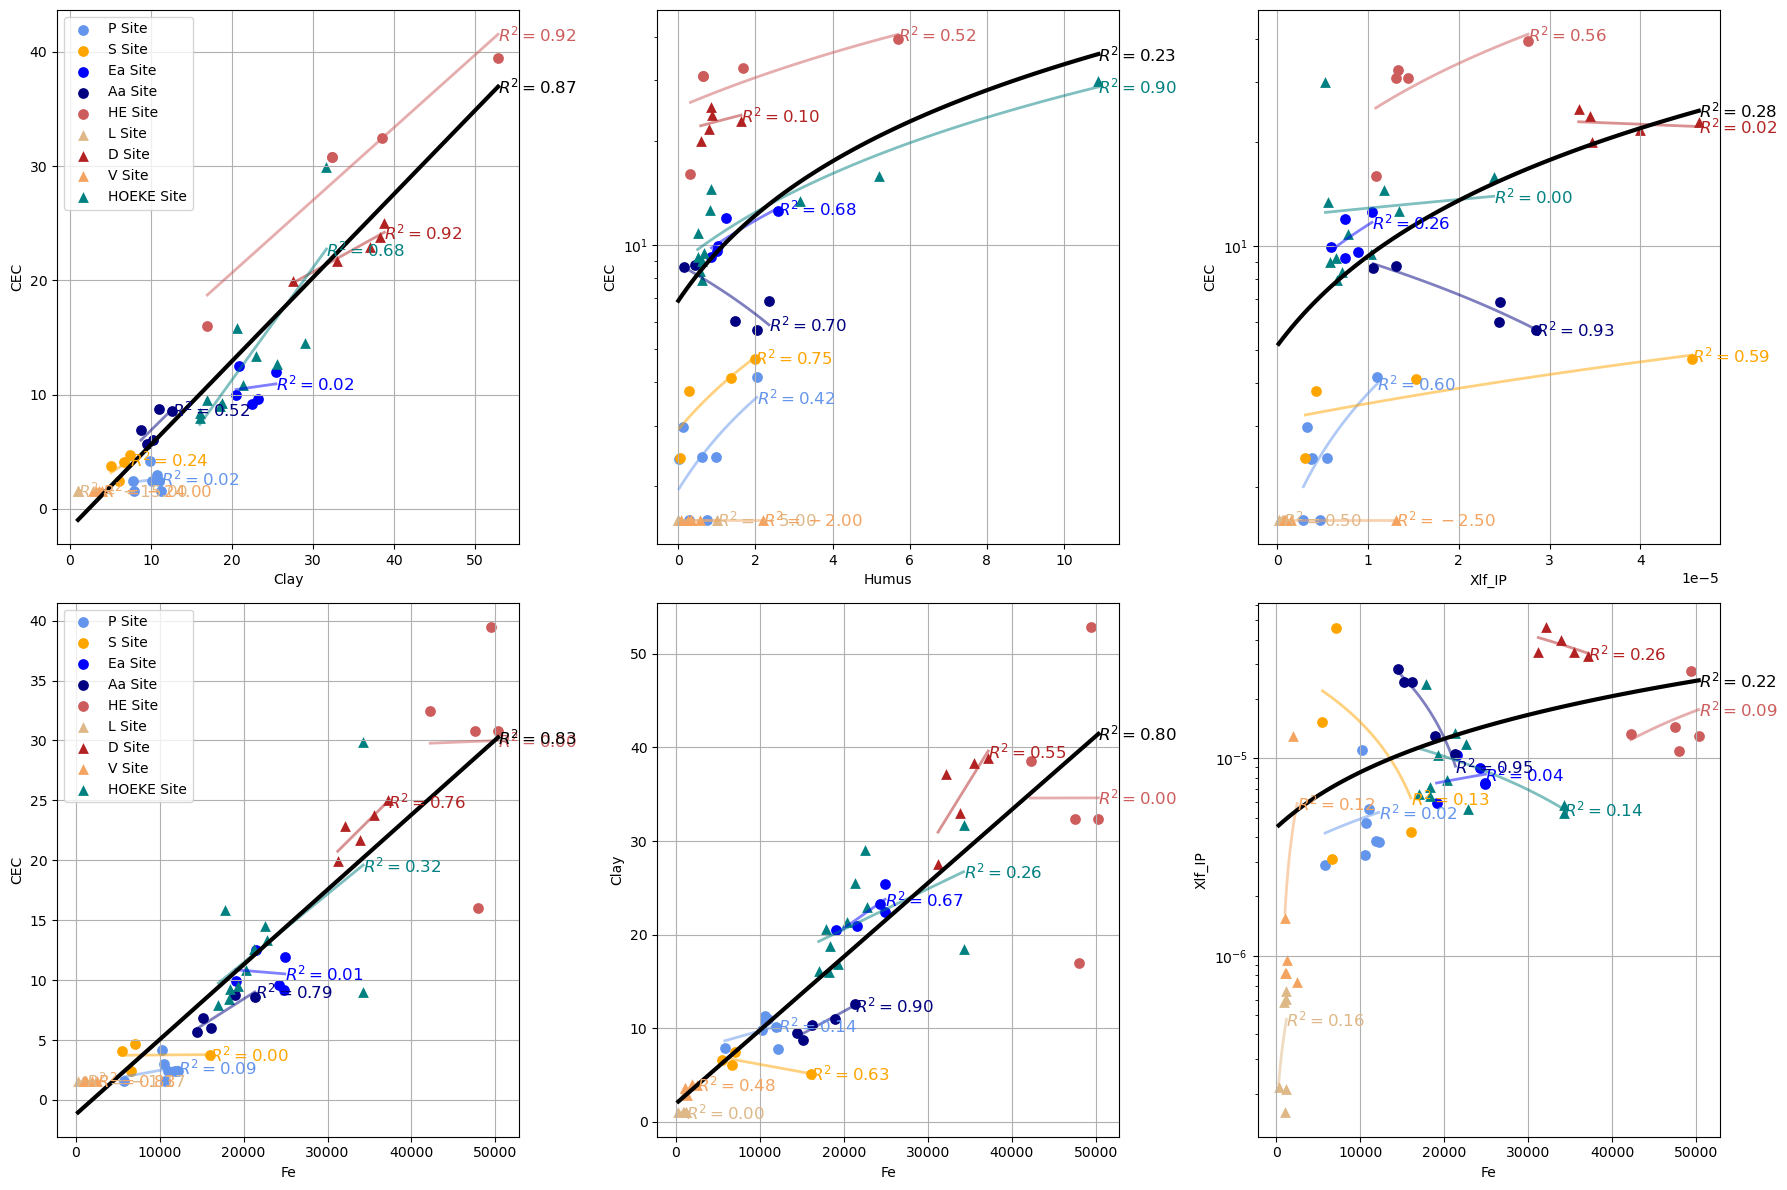

In [125]:
# Extract columns for plotting
x_col_clay = 'Clay'
y_col_cec = 'CEC'
x_col_xlf_ip = 'Xlf_IP'
x_col_ec_hp = 'EC_HP'
x_col_fe = 'Fe'
x_col_humus = 'Humus'

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# First row plots using df
# Plot scatter and regression lines for Clay vs CEC
plot_data1(axs[0, 0], df_xrf, x_col_clay, y_col_cec, include_label=True)
axs[0, 0].set_xlabel('Clay')
axs[0, 0].set_ylabel('CEC')
axs[0, 0].grid(True)

# Plot scatter and regression lines for Clay vs Xlf_IP
plot_data1(axs[0, 1], df_xrf, x_col_humus, y_col_cec, include_label=False)
axs[0, 1].set_xlabel('Humus')
axs[0, 1].set_ylabel('CEC')
axs[0, 1].grid(True)
axs[0, 1].set_yscale('log')

# Plot scatter and regression lines for CEC vs Xlf_IP
plot_data1(axs[0, 2], df_xrf, x_col_xlf_ip, y_col_cec, include_label=False)
axs[0, 2].set_ylabel('CEC')
axs[0, 2].set_xlabel('Xlf_IP')
axs[0, 2].grid(True)
axs[0, 2].set_yscale('log')

# Second row plots using dff
# Plot scatter and regression lines for Clay vs EC_HP
plot_data1(axs[1, 0], df_xrf, x_col_fe, y_col_cec, include_label=True)
axs[1, 0].set_xlabel('Fe')
axs[1, 0].set_ylabel('CEC')
axs[1, 0].grid(True)

# Plot scatter and regression lines for CEC vs EC_HP
plot_data1(axs[1, 1], df_xrf, x_col_fe, x_col_clay, include_label=False)
axs[1, 1].set_xlabel('Fe')
axs[1, 1].set_ylabel('Clay')
axs[1, 1].grid(True)

# Plot scatter and regression lines for Xlf_IP vs EC_HP
plot_data1(axs[1, 2], df_xrf, x_col_fe, x_col_xlf_ip, include_label=False)
axs[1, 2].set_ylabel('Xlf_IP')
axs[1, 2].set_xlabel('Fe')
axs[1, 2].grid(True)
axs[1, 2].set_yscale('log')

plt.tight_layout()
plt.show()

C:\Users\mendo\AppData\Local\Temp\ipykernel_26964\600492437.py:18: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(df[x_col_name][mask], df[y_col_name][mask], 1)


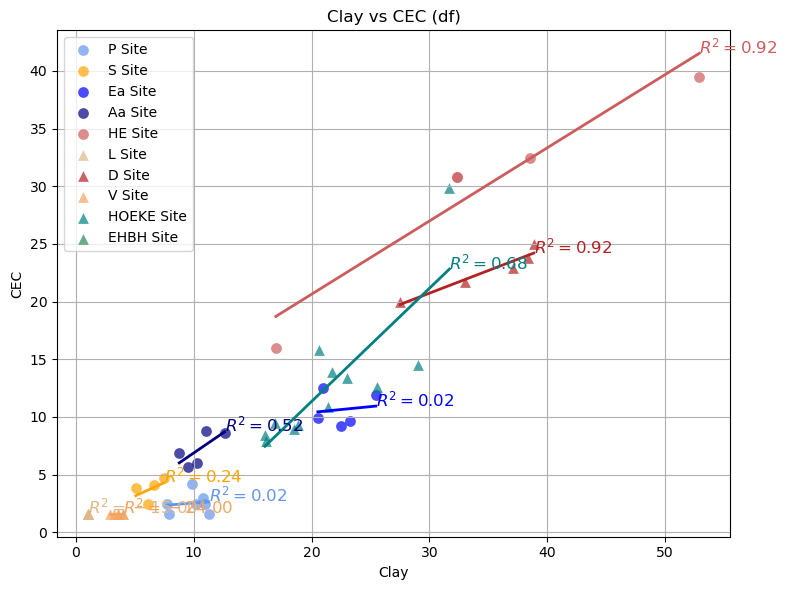

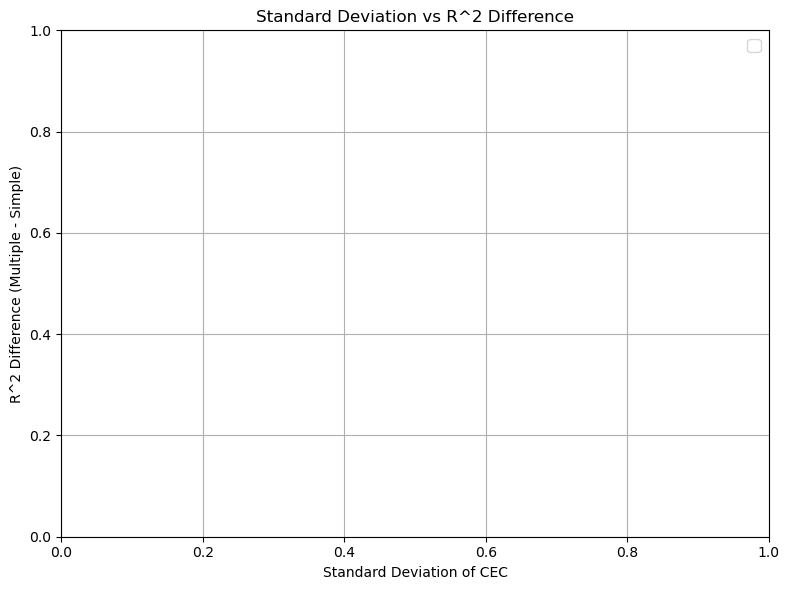

In [126]:
# Function to plot data with linear regression and display R^2 score
def plot_data1(axis, df, x_col_name, y_col_name, include_label=False, aa=0.7, ss=60, lw=0, label_fontsize=10, legend_fontsize=10):
    slopes = []
    intercepts = []
    avg_xlf_ips = []
    std_devs = []
    r2_diffs = []
    
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        label = f"{start_str} Site" if include_label else None
        
        # Scatter plot
        axis.scatter(df[x_col_name][mask], df[y_col_name][mask], alpha=aa, s=ss, linewidth=lw, c=color, marker=marker, label=label)
        
        # Simple linear regression
        if mask.sum() > 0:  # Ensure there are points to fit
            slope, intercept = np.polyfit(df[x_col_name][mask], df[y_col_name][mask], 1)
            x_fit = np.linspace(df[x_col_name][mask].min(), df[x_col_name][mask].max(), 100)
            y_fit = slope * x_fit + intercept
            axis.plot(x_fit, y_fit, color=color, linestyle='-', linewidth=2)
            
            # Calculate and display simple linear regression R^2 score
            y_pred_simple = slope * df[x_col_name][mask] + intercept
            r2_simple = r2_score(df[y_col_name][mask], y_pred_simple)
            axis.text(x_fit[-1], y_fit[-1], f"$R^2={r2_simple:.2f}$", color=color, fontsize=12)
            
            # Multiple linear regression with Xlf_IP as an additional feature
            X = df[[x_col_name, 'Xlf_IP']][mask]
            y = df[y_col_name][mask]
            model = LinearRegression().fit(X, y)
            y_pred_multi = model.predict(X)
            r2_multi = r2_score(y, y_pred_multi)
            
            # Display multiple linear regression R^2 score
            #axis.text(x_fit[-1], y_fit[-1] * 0.9, f"$R^2 Xlf={r2_multi:.2f}$", color=color, fontsize=12)
            
            # Save standard deviation and R^2 difference
            std_dev = df[y_col_name][mask].std()
            std_devs.append(std_dev)
            r2_diff = r2_multi - r2_simple
            r2_diffs.append(r2_diff)
    
    if include_label:
        axis.legend(fontsize=legend_fontsize)
    
    return std_devs, r2_diffs

# Extract columns for plotting
x_col_clay = 'Clay'
y_col_cec = 'CEC'

fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatter and regression lines for Clay vs CEC
std_devs, r2_diffs = plot_data1(ax, df, x_col_clay, y_col_cec, include_label=True)
ax.set_xlabel('Clay')
ax.set_ylabel('CEC')
ax.set_title('Clay vs CEC (df)')
ax.grid(True)

plt.tight_layout()
plt.show()

# Plot standard deviation versus R^2 difference
fig, ax2 = plt.subplots(figsize=(8, 6))
for start_str, (color, marker) in mapping.items():
    for std, r2_diff in zip(std_devs, r2_diffs):
        if start_str in df['SAMPLE'].unique():
            label = f"{start_str} Site" if True else None
            ax2.scatter(std, r2_diff, color=color, s=100, label=label)
            ax2.text(std, r2_diff, start_str, fontsize=12, color=color)

ax2.set_xlabel('Standard Deviation of CEC')
ax2.set_ylabel('R^2 Difference (Multiple - Simple)')
ax2.set_title('Standard Deviation vs R^2 Difference')
ax2.grid(True)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, fontsize=12)

plt.tight_layout()
plt.show()

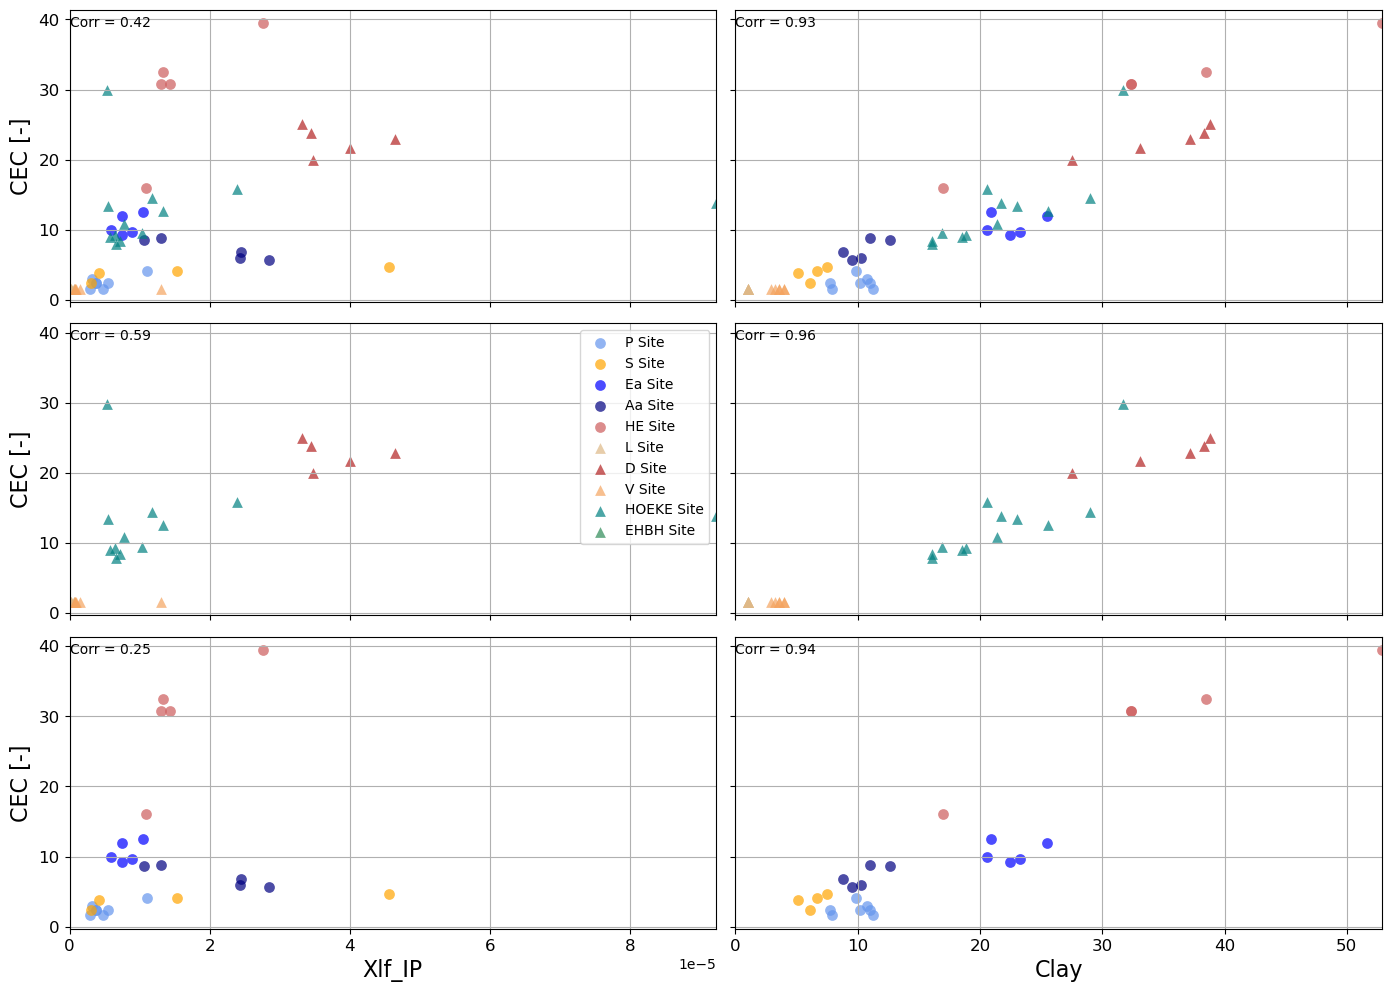

In [127]:
def plot_data2(axis, x_col, y_col, include_label=False, aa=0.7, ss=60, lw=0, label_fontsize=10, legend_fontsize=10):
    corr = round(np.corrcoef(x_col, y_col)[0][1], 2)
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        label = f"{start_str} Site" if include_label else None
        axis.scatter(x_col[mask], y_col[mask], alpha=aa, s=ss, linewidth=lw, c=color, marker=marker, label=label)
    # Apply logarithmic scale to the y-axis
    #axis.set_xscale('log')

    axis.text(0, 0.98, s=f'Corr = {corr}', fontsize=label_fontsize, 
              verticalalignment='top', horizontalalignment='left', 
              transform=axis.transAxes)
    if include_label:
        axis.legend(fontsize=legend_fontsize)
        

def create_and_save_plots2(target_var, pred1, pred2):
    # Ensure the output folder exists, create it if it doesn't
    output_folder = 'figures_output'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Create subplots with shared x-axes within each column
    fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharey=True, sharex='col')
    axes = axes.flatten()  # Flatten to easily iterate over

    # Define your conditions for plotting
    conditions = [
        (df[pred1], df[target_var], 0, max(df[pred1])),  
        (df[pred2], df[target_var], 0, max(df[pred2])),  
        (df[pred1][df['Archaeology'] == 1], df[target_var][df['Archaeology'] == 1], 0, max(df[pred1]), True),  
        (df[pred2][df['Archaeology'] == 1], df[target_var][df['Archaeology'] == 1], 0, max(df[pred2])),
        (df[pred1][df['Archaeology'] == 0], df[target_var][df['Archaeology'] == 0], 0, max(df[pred1])),
        (df[pred2][df['Archaeology'] == 0], df[target_var][df['Archaeology'] == 0], 0, max(df[pred2])),
    ]
    # Loop through conditions and plot
    for i, (ax, (x, y, xlim_lower, xlim_upper, *include_label)) in enumerate(zip(axes, conditions)):
        plot_data2(ax, x, y, include_label=bool(include_label))
        ax.set_xlim(xlim_lower, xlim_upper)  # Set x-axis limits
        ax.grid(True)  # Enable the grid
        ax.tick_params(axis='y', labelsize=12) 
        ax.tick_params(axis='x', labelsize=12) 
        # Set y-axis label for the first and fourth plot (left column)
        if i == 0 or i == 2 or i == 4:
            ax.set_ylabel(f'{target_var} [-]', fontsize=16)

    # Set legend for the third subplot (index 2)
    axes[2].legend(loc='upper right', fontsize=10)
    axes[4].set_xlabel(pred1, fontsize=16)  # Set x-axis label
    axes[5].set_xlabel(pred2, fontsize=16)  # Set x-axis label

    plt.tight_layout(pad=1.0)  # Adjust layout

    # Full file path
    file_name = target_var + pred1 + pred2 + '.png'
    full_file_path = os.path.join(output_folder, file_name)

    # Save and show the figure
    plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
    plt.show()
    
create_and_save_plots2('CEC', 'Xlf_IP', 'Clay')

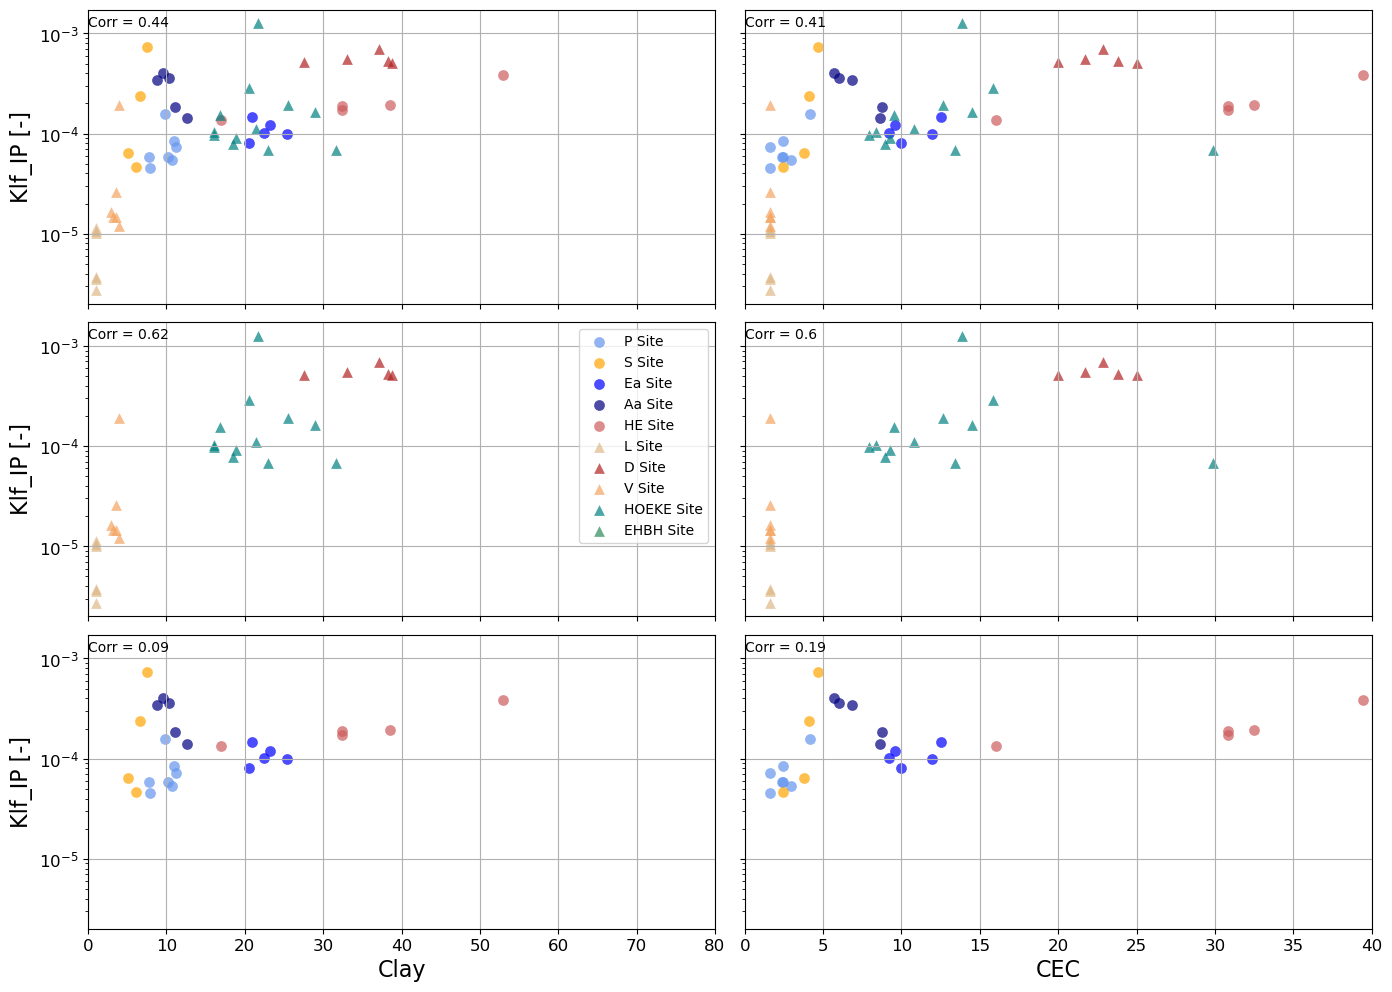

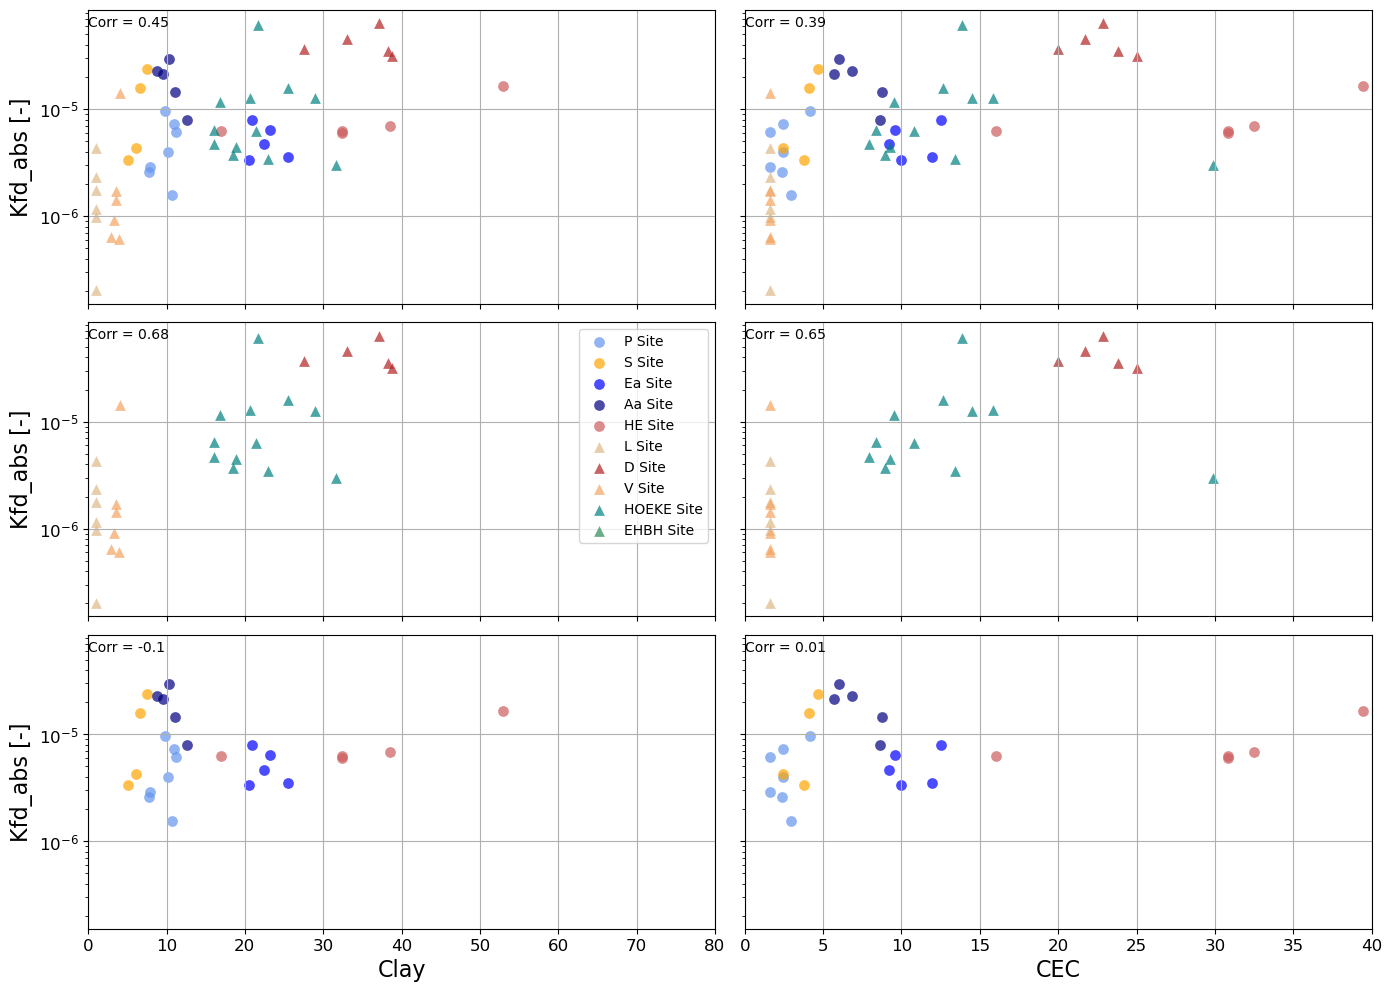

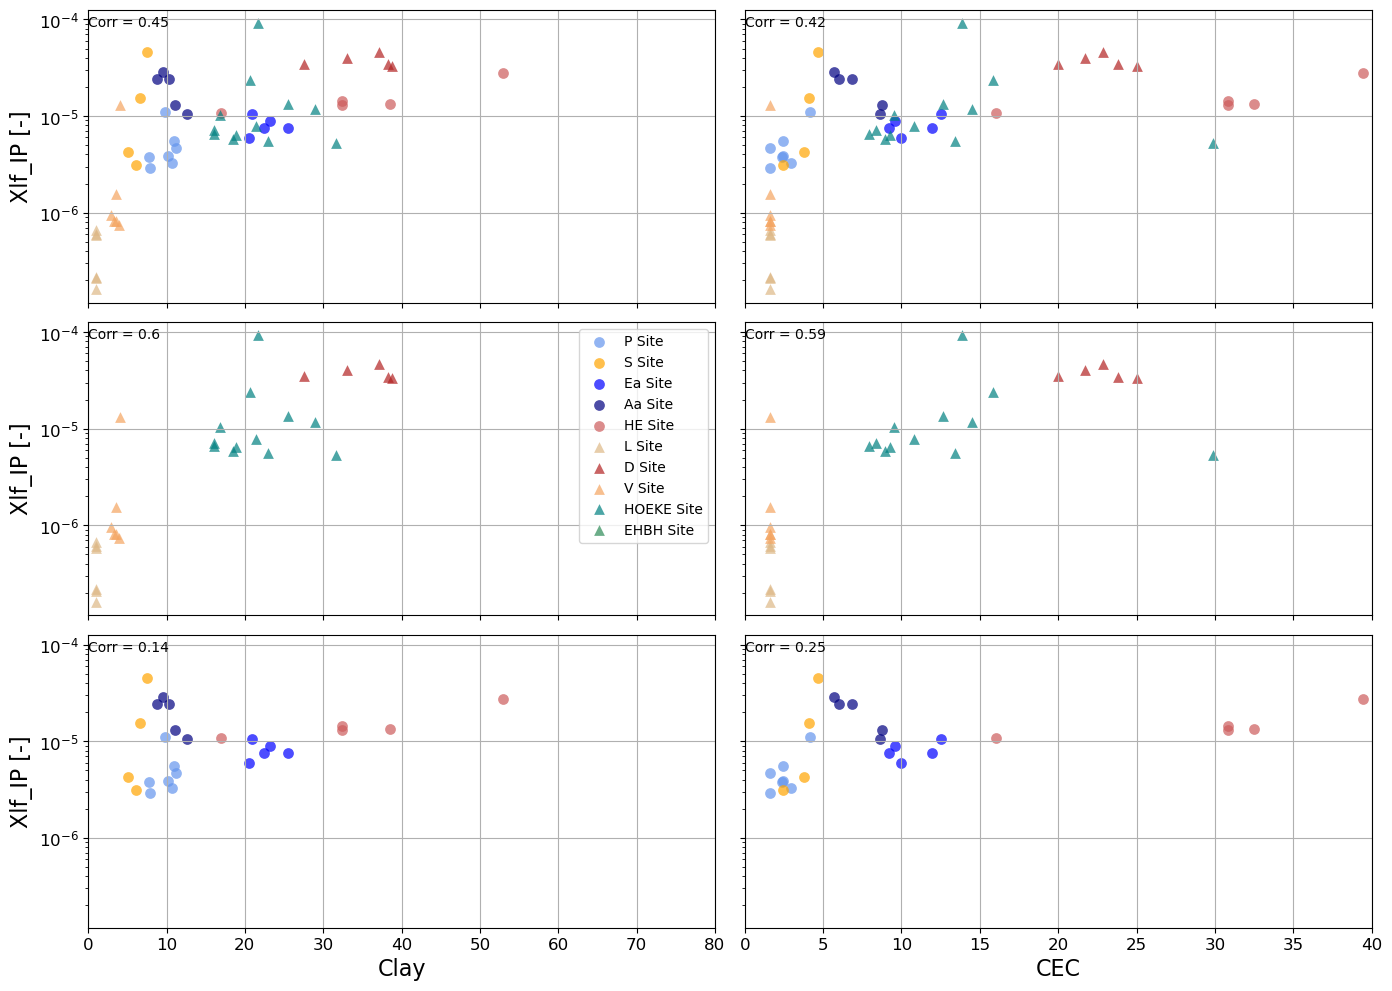

In [128]:
def plot_data(axis, x_col, y_col, include_label=False, aa=0.7, ss=60, lw=0, label_fontsize=10, legend_fontsize=10):
    corr = round(np.corrcoef(x_col, y_col)[0][1], 2)
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        label = f"{start_str} Site" if include_label else None
        axis.scatter(x_col[mask], y_col[mask], alpha=aa, s=ss, linewidth=lw, c=color, marker=marker, label=label)
    # Apply logarithmic scale to the y-axis

    axis.set_yscale('log')
    axis.text(0, 0.98, s=f'Corr = {corr}', fontsize=label_fontsize, 
              verticalalignment='top', horizontalalignment='left', 
              transform=axis.transAxes)
    if include_label:
        axis.legend(fontsize=legend_fontsize)
        

def create_and_save_plots(target_var, pred1, pred2):
    # Ensure the output folder exists, create it if it doesn't
    output_folder = 'figures_output'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Create subplots with shared x-axes within each column
    fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharey=True, sharex='col')
    axes = axes.flatten()  # Flatten to easily iterate over

    # Define your conditions for plotting
    conditions = [
        (df[pred1], df[target_var], 0, 80),  
        (df[pred2], df[target_var], 0, 40),  
        (df[pred1][df['Archaeology'] == 1], df[target_var][df['Archaeology'] == 1], 0, 80, True),  
        (df[pred2][df['Archaeology'] == 1], df[target_var][df['Archaeology'] == 1], 0, 40),
        (df[pred1][df['Archaeology'] == 0], df[target_var][df['Archaeology'] == 0], 0, 80),
        (df[pred2][df['Archaeology'] == 0], df[target_var][df['Archaeology'] == 0], 0, 40),
    ]
    # Loop through conditions and plot
    for i, (ax, (x, y, xlim_lower, xlim_upper, *include_label)) in enumerate(zip(axes, conditions)):
        plot_data(ax, x, y, include_label=bool(include_label))
        ax.set_xlim(xlim_lower, xlim_upper)  # Set x-axis limits
        ax.grid(True)  # Enable the grid
        ax.tick_params(axis='y', labelsize=12) 
        ax.tick_params(axis='x', labelsize=12) 
        # Set y-axis label for the first and fourth plot (left column)
        if i == 0 or i == 2 or i == 4:
            ax.set_ylabel(f'{target_var} [-]', fontsize=16)

    # Set legend for the third subplot (index 2)
    axes[2].legend(loc='upper right', fontsize=10)
    axes[4].set_xlabel(pred1, fontsize=16)  # Set x-axis label
    axes[5].set_xlabel(pred2, fontsize=16)  # Set x-axis label

    plt.tight_layout(pad=1.0)  # Adjust layout

    # Full file path
    file_name = target_var + pred1 + pred2 + '.png'
    full_file_path = os.path.join(output_folder, file_name)

    # Save and show the figure
    plt.savefig(full_file_path, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
create_and_save_plots('Klf_IP', 'Clay', 'CEC')
create_and_save_plots('Kfd_abs', 'Clay', 'CEC')
create_and_save_plots('Xlf_IP', 'Clay', 'CEC')

## Modelling Klf (Clay, CEC) and CEC (Klf, Clay). Non tropical soils
#### No train-test


In [129]:
results_r2 = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])
results_rmse = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])

In [130]:
# Function to perform linear regression and print results
def perform_regression_and_select_best(feature_sets, target, df):
    print('perform_regression_and_select_best:', feature_sets, target)
    best_score = float('-inf')
    best_regressor = None
    best_features = None
    
    for features in feature_sets:
        reg = LinearRegression().fit(df[list(features)].to_numpy(), df[target])
        predictions = reg.predict(df[list(features)].to_numpy())
        score = reg.score(df[list(features)].to_numpy(), df[target])
        rmse = np.sqrt(np.median((predictions - df[target])**2))

        # Print results for each feature set
        print(f'Feature(s) {features}')
        print(f'RMSE: {rmse:.8f}')
        print(f'Score: {score:.3f}')
        print(f"Coefficients: {reg.coef_}", f"Intercept: {reg.intercept_}\n")
                
        # Update best regressor based on R² score
        if score > best_score:
            best_score = score
            best_regressor = reg
            best_features = features
    
    # Return the best regressor and its features
    return best_regressor, best_features

In [131]:
# Define feature sets for regressions
feature_sets_1 = [('Clay',), ('Clay', 'Sand'), ('Clay', 'Klf_IP'), ('Clay', 'Kfd'), ('Clay', 'Humus')]
target_1 = 'CEC'
feature_sets_2 = [('Clay',), ('Clay', 'CEC'), ('Clay', 'Sand'), ('Clay', 'Humus')]
target_2 = 'Klf_IP'

# Generalize the meshgrid and Z values generation
def generate_meshgrid_and_Z(reg, df, features, n_points=50):
    x_range = np.linspace(df[features[0]].min(), df[features[0]].max(), n_points)
    y_range = np.linspace(df[features[1]].min(), df[features[1]].max(), n_points)
    X, Y = np.meshgrid(x_range, y_range)
    Z = reg.coef_[0] * X + reg.coef_[1] * Y + reg.intercept_
    return X, Y, Z

# Define your df, feature_sets_1, and feature_sets_2 as before

# Find the best regressor and its features for each target
best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, df)
best_reg_2, best_features_2 = perform_regression_and_select_best(feature_sets_2, target_2, df)

# Generate meshgrids and Z values for the best regressor of each set
X1, Y1, Z1 = generate_meshgrid_and_Z(best_reg_1, df, best_features_1)
X2, Y2, Z2 = generate_meshgrid_and_Z(best_reg_2, df, best_features_2)

# Interactive plots
def interactive_plot_1(elev=30, azim=30):
    plot_3d(df, best_features_1[0], best_features_1[1], target_1, X1, Y1, Z1, elev, azim)

def interactive_plot_2(elev=30, azim=30):
    plot_3d(df, best_features_2[0], best_features_2[1], target_2, X2, Y2, Z2, elev, azim)

# Display interactive widgets
display(widgets.interactive(interactive_plot_1, elev=(0, 90, 2), azim=(0, 360, 2)))
display(widgets.interactive(interactive_plot_2, elev=(0, 90, 2), azim=(0, 360, 2)))
# Here we implemented linear functions to predict soil CEC based on different features. The model development fits the entire dataset.
# With these trhee conditions, adding soil susceptibility to clay is the optimal for CEC prediction.
# Further analysis follows the same problem for non-linear modelling with split of train and test datasets

perform_regression_and_select_best: [('Clay',), ('Clay', 'Sand'), ('Clay', 'Klf_IP'), ('Clay', 'Kfd'), ('Clay', 'Humus')] CEC
Feature(s) ('Clay',)
RMSE: 2.47452815
Score: 0.874
Coefficients: [0.73] Intercept: -1.7014623698843483

Feature(s) ('Clay', 'Sand')
RMSE: 2.25939862
Score: 0.876
Coefficients: [0.77 0.02] Intercept: -3.1516628822167867

Feature(s) ('Clay', 'Klf_IP')
RMSE: 2.45778558
Score: 0.874
Coefficients: [   0.73 -210.02] Intercept: -1.6899569807632542

Feature(s) ('Clay', 'Kfd')
RMSE: 2.22783088
Score: 0.877
Coefficients: [0.75 0.06] Intercept: -2.423361137866676

Feature(s) ('Clay', 'Humus')
RMSE: 2.13115299
Score: 0.887
Coefficients: [0.69 0.68] Intercept: -1.9190447497052077

perform_regression_and_select_best: [('Clay',), ('Clay', 'CEC'), ('Clay', 'Sand'), ('Clay', 'Humus')] Klf_IP
Feature(s) ('Clay',)
RMSE: 0.00009036
Score: 0.198
Coefficients: [8.33e-06] Intercept: 5.4781685799955645e-05

Feature(s) ('Clay', 'CEC')
RMSE: 0.00009280
Score: 0.198
Coefficients: [ 8.89e-

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [132]:
# Assuming df is your DataFrame
median_humus = df['Humus'].median()
top_soil = df[df['Humus'] > median_humus]
sub_soil = df[df['Humus'] <= median_humus]


# Assuming df is your DataFrame
median_clay = df['Clay'].median()
print(median_clay)
clay_soil = df[df['Clay'] > median_clay]
sandy_soil = df[df['Clay'] <= median_clay]


best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, sandy_soil)
best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, clay_soil)

best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, sandy_soil)
best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, clay_soil)

12.61630630493164
perform_regression_and_select_best: [('Clay',), ('Clay', 'Sand'), ('Clay', 'Klf_IP'), ('Clay', 'Kfd'), ('Clay', 'Humus')] CEC
Feature(s) ('Clay',)
RMSE: 0.76645873
Score: 0.429
Coefficients: [0.37] Intercept: 0.8474389124604533

Feature(s) ('Clay', 'Sand')
RMSE: 0.33341513
Score: 0.620
Coefficients: [-0.02 -0.06] Intercept: 7.106645361415392

Feature(s) ('Clay', 'Klf_IP')
RMSE: 0.48865135
Score: 0.549
Coefficients: [2.74e-01 5.10e+03] Intercept: 0.8210324298616074

Feature(s) ('Clay', 'Kfd')
RMSE: 0.76263610
Score: 0.434
Coefficients: [0.39 0.01] Intercept: 0.5764403201048474

Feature(s) ('Clay', 'Humus')
RMSE: 0.68001279
Score: 0.459
Coefficients: [0.34 0.51] Intercept: 0.6646874859109215

perform_regression_and_select_best: [('Clay',), ('Clay', 'Sand'), ('Clay', 'Klf_IP'), ('Clay', 'Kfd'), ('Clay', 'Humus')] CEC
Feature(s) ('Clay',)
RMSE: 3.19445526
Score: 0.785
Coefficients: [0.88] Intercept: -6.135586908812094

Feature(s) ('Clay', 'Sand')
RMSE: 2.86869987
Score: 0

In [133]:
def stochastic_poly(df, feature_columns, Y, n=4, iters=50, round_n=3):
    ypred_train_best, ypred_test_best, R2_train_t_best, R2_test_t_best, RMSE_train_t_best, RMSE_test_t_best = [], [], [], [], [], []
    X = df[feature_columns]

    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
        LinReg = LinearRegression()
        ypred_train_, ypred_test_, R2_train_t_, R2_test_t_, RMSE_train_t_, RMSE_test_t_ = [], [], [], [], [], []

        for k in range(n):
            poly = PolynomialFeatures(degree=k)
            poly.fit(X_train)
            Xt_train = poly.transform(X_train)
            Xt_test = poly.transform(X_test)

            LinReg.fit(Xt_train, y_train)
            ypred_train = LinReg.predict(Xt_train)
            ypred_test = LinReg.predict(Xt_test)

            R2_train_t = r2_score(y_train, ypred_train)
            R2_test_t = r2_score(y_test, ypred_test)
            RMSE_train_t = RMSE(y_train, ypred_train)
            RMSE_test_t = RMSE(y_test, ypred_test)

            ypred_train_.append(ypred_train)
            ypred_test_.append(ypred_test)
            R2_train_t_.append(R2_train_t)
            R2_test_t_.append(R2_test_t)
            RMSE_train_t_.append(RMSE_train_t)
            RMSE_test_t_.append(RMSE_test_t)

        ypred_train_best.append(ypred_train_)
        ypred_test_best.append(ypred_test_)
        R2_train_t_best.append(R2_train_t_)
        R2_test_t_best.append(R2_test_t_)
        RMSE_train_t_best.append(RMSE_train_t_)
        RMSE_test_t_best.append(RMSE_test_t_)

    r2_test_n1 = [inner_list[0] for inner_list in R2_test_t_best]
    r2_test_n2 = [inner_list[1] for inner_list in R2_test_t_best]
    r2_test_n3 = [inner_list[2] for inner_list in R2_test_t_best]
    r2_test_n4 = [inner_list[3] for inner_list in R2_test_t_best]
    
    r2_medians = [np.median(r2_test_n1), np.median(r2_test_n2), np.median(r2_test_n3), np.median(r2_test_n4)]
    best_n = r2_medians.index(np.max(r2_medians))
    return best_n, round(np.median([inner_list[best_n] for inner_list in R2_test_t_best]), round_n), round(np.median([inner_list[best_n] for inner_list in R2_train_t_best]), round_n), round(np.median([inner_list[best_n] for inner_list in RMSE_test_t_best]), round_n), round(np.median([inner_list[best_n] for inner_list in RMSE_train_t_best]), round_n)                                             

## CEC prediction with Train-Test

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.862 0.892 3.319 3.203 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.035 0.244 8.542 8.487 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.231 0.33 8.155 7.885 ['MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.11 0.346 8.572 7.77 ['Humus', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.851 0.89 3.344 3.254 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.847 0.877 3.422 3.43 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.848 0.881 3.395 3.392 ['Clay', 'MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.845 0.89 3.344 3.253 ['Clay', 'Humus', 'Khf_IP']
best_n, R2_test_pol, R2_trai

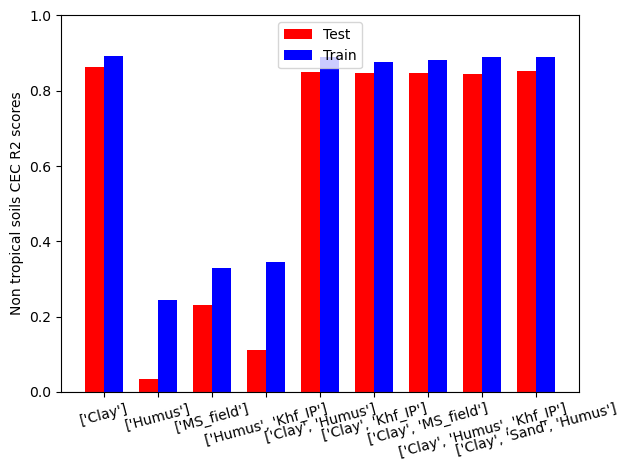

R2 0.8741633709292842
RMSE 3.3986443672485174
LinReg_CEC_NTS [   0.      0.73 -120.83]


interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [134]:
feature_sets_CEC = [
    ['Clay'],
    ['Humus'],
    ['MS_field'],
    ['Humus', 'Khf_IP'],
    ['Clay', 'Humus'],
  # ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'MS_field'],
    ['Clay', 'Humus', 'Khf_IP'],
    ['Clay', 'Sand', 'Humus']
]

df_CEC = df['CEC']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, df_CEC, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets_CEC, test_errors_summary, train_errors_summary, 'Non tropical soils CEC')

################## Puesta en marcha y plot #################

LinReg_CEC_NTS = LinearRegression()
x = df[['Clay', 'Khf_IP']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_NTS.fit(xt, df_CEC)
ypred = LinReg_CEC_NTS.predict(xt)
R2 = r2_score(df_CEC, ypred)
RMSE_ = RMSE(df_CEC, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a2 = np.linspace(df.Clay.min(), df.Clay.max(), 50)
b2 = np.linspace(df.Khf_IP.min(), df.Khf_IP.max(), 50)
A2, B2 = np.meshgrid(a2, b2)

print('LinReg_CEC_NTS', LinReg_CEC_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
Z2 = LinReg_CEC_NTS.coef_[0]*LinReg_CEC_NTS.intercept_ + LinReg_CEC_NTS.coef_[1]*A2 + LinReg_CEC_NTS.coef_[2]*B2 + LinReg_CEC_NTS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df, 'Clay', 'Khf_IP', 'CEC', A2, B2, Z2, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

# CEC prediction with Train and Test for Sandy

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.322 0.424 1.785 1.599 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.004 0.142 2.235 1.9 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.55 0.647 1.485 1.236 ['MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.074 0.372 2.202 1.57 ['Humus', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.319 0.471 1.794 1.528 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.707 0.892 1.082 0.672 ['Clay', 'MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.274 0.579 1.8 1.38 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.149 0.588 1.857 1.326 ['Clay', 'Humus', 'Khf_IP']
best_n, R2_test_pol, R2_train

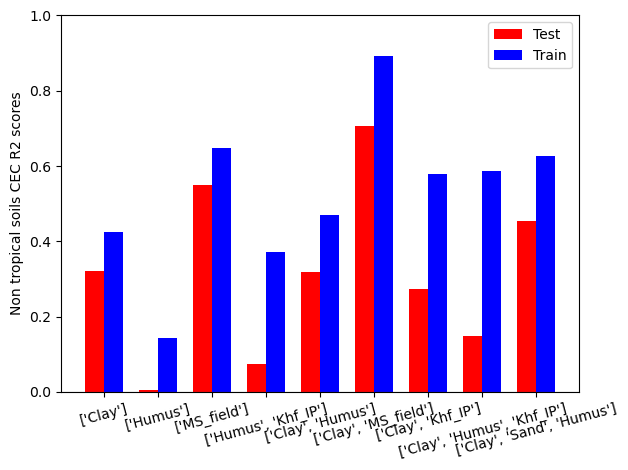

R2 0.545121900454731
RMSE 1.4533900192052267
LinReg_CEC_NTS [0.00e+00 2.77e-01 5.23e+03]


interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [135]:
feature_sets_CEC = [
    ['Clay'],
    ['Humus'],
    ['MS_field'],
    ['Humus', 'Khf_IP'],
    ['Clay', 'Humus'],
  #  ['Clay', 'pH_eau'],
    ['Clay', 'MS_field'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'Humus', 'Khf_IP'],
    ['Clay', 'Sand', 'Humus']
]

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(sandy_soil, feature_set, sandy_soil['CEC'], iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets_CEC, test_errors_summary, train_errors_summary, 'Non tropical soils CEC')

################## Puesta en marcha y plot #################

LinReg_CEC_NTS = LinearRegression()
x = sandy_soil[['Clay', 'Khf_IP']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_NTS.fit(xt, sandy_soil['CEC'])
ypred = LinReg_CEC_NTS.predict(xt)
R2 = r2_score(sandy_soil['CEC'], ypred)
RMSE_ = RMSE(sandy_soil['CEC'], ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a2 = np.linspace(sandy_soil.Clay.min(), sandy_soil.Clay.max(), 50)
b2 = np.linspace(sandy_soil.Khf_IP.min(), sandy_soil.Khf_IP.max(), 50)
A2, B2 = np.meshgrid(a2, b2)

print('LinReg_CEC_NTS', LinReg_CEC_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
Z2 = LinReg_CEC_NTS.coef_[0]*LinReg_CEC_NTS.intercept_ + LinReg_CEC_NTS.coef_[1]*A2 + LinReg_CEC_NTS.coef_[2]*B2 + LinReg_CEC_NTS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(sandy_soil, 'Clay', 'Khf_IP', 'CEC', A2, B2, Z2, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.691 0.802 4.41 4.033 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 0 -0.104 0.0 8.881 8.997 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 -0.082 0.153 8.398 8.277 ['MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 0 -0.104 0.0 8.881 8.997 ['Humus', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.684 0.818 4.58 3.789 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.659 0.803 4.644 3.959 ['Clay', 'Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.68 0.809 4.45 3.935 ['Clay', 'MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.653 0.82 4.634 3.776 ['Clay', 'Humus', 'Khf_IP']
best_n, R2_test_pol, R2_trai

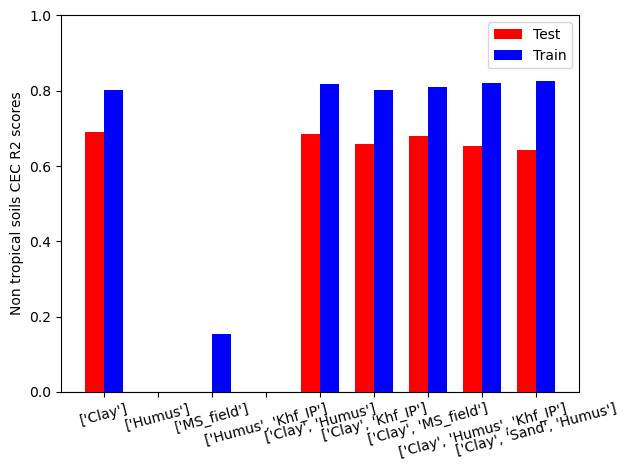

R2 0.7867490340634423
RMSE 4.072982868173503
LinReg_CEC_NTS [ 0.00e+00  9.00e-01 -1.63e+03]


interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [136]:
feature_sets_CEC = [
    ['Clay'],
    ['Humus'],
    ['MS_field'],

    ['Humus', 'Khf_IP'],
    ['Clay', 'Humus'],
 #   ['Clay', 'pH_eau'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'MS_field'],
    ['Clay', 'Humus', 'Khf_IP'],
    ['Clay', 'Sand', 'Humus']
]

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(clay_soil, feature_set, clay_soil['CEC'], iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets_CEC, test_errors_summary, train_errors_summary, 'Non tropical soils CEC')

################## Puesta en marcha y plot #################

LinReg_CEC_NTS = LinearRegression()
x = clay_soil[['Clay', 'Khf_IP']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_CEC_NTS.fit(xt, clay_soil['CEC'])
ypred = LinReg_CEC_NTS.predict(xt)
R2 = r2_score(clay_soil['CEC'], ypred)
RMSE_ = RMSE(clay_soil['CEC'], ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a2 = np.linspace(clay_soil.Clay.min(), clay_soil.Clay.max(), 50)
b2 = np.linspace(clay_soil.Khf_IP.min(), clay_soil.Khf_IP.max(), 50)
A2, B2 = np.meshgrid(a2, b2)

print('LinReg_CEC_NTS', LinReg_CEC_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
Z2 = LinReg_CEC_NTS.coef_[0]*LinReg_CEC_NTS.intercept_ + LinReg_CEC_NTS.coef_[1]*A2 + LinReg_CEC_NTS.coef_[2]*B2 + LinReg_CEC_NTS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(clay_soil, 'Clay', 'Khf_IP', 'CEC', A2, B2, Z2, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

## Khf_IP prediction with Train-Test

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.105 0.219 0.0 0.0 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 0 -0.064 0.0 0.0 0.0 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.009 0.167 0.0 0.0 ['Humus', 'CEC']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.055 0.231 0.0 0.0 ['Clay', 'Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.18 0.422 0.0 0.0 ['Clay', 'CEC']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.049 0.256 0.0 0.0 ['Clay', 'Humus', 'CEC']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.032 0.235 0.0 0.0 ['Clay', 'Sand', 'Humus']


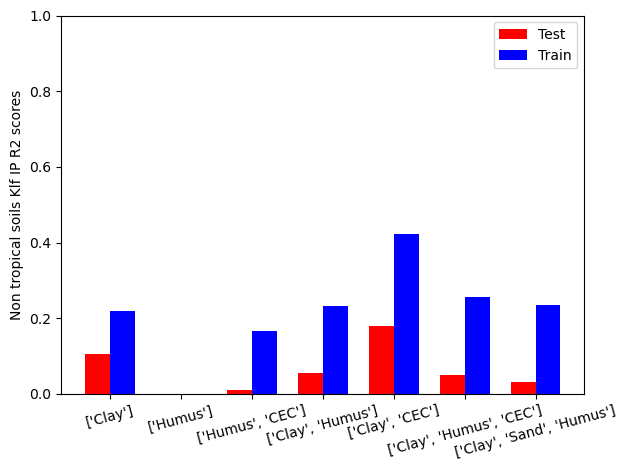

R2 0.23212515313340076
RMSE 0.00021540217421005156
LinReg_Klf_NTS [ 0.00e+00  1.68e-05 -1.04e-05]


interactive(children=(IntSlider(value=30, description='elev', max=90, step=2), IntSlider(value=30, description…

In [137]:
feature_sets_Klf = [
    ['Clay'],
    ['Humus'],
    ['Humus', 'CEC'],
    ['Clay', 'Humus'],
  #  ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['Clay', 'Humus', 'CEC'],
    ['Clay', 'Sand', 'Humus']
]

#df_Klf = df['Khf_IP']
df_Klf = df['MS_field']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets_Klf:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, df_Klf, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets_Klf, test_errors_summary, train_errors_summary, 'Non tropical soils Klf IP')

################## Puesta en marcha y plot #################

LinReg_Klf_NTS = LinearRegression()
x = df[['Clay', 'CEC']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_Klf_NTS.fit(xt, df_Klf)
ypred = LinReg_Klf_NTS.predict(xt)
R2 = r2_score(df_Klf, ypred)
RMSE_ = RMSE(df_Klf, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a2 = np.linspace(df.Clay.min(), df.Clay.max(), 50)
b2 = np.linspace(df.Khf_IP.min(), df.Khf_IP.max(), 50)
A2, B2 = np.meshgrid(a2, b2)

print('LinReg_Klf_NTS', LinReg_Klf_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
Z2 = LinReg_Klf_NTS.coef_[0]*LinReg_Klf_NTS.intercept_ + LinReg_Klf_NTS.coef_[1]*A2 + LinReg_Klf_NTS.coef_[2]*B2 + LinReg_Klf_NTS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df, 'Clay', 'CEC', 'Klf_IP', A2, B2, Z2, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.